In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

In [3]:
df = pd.io.sql.read_sql('''select uid, timestamp from checker where uid like "user_%"''',con, parse_dates=['timestamp'])

In [4]:
df.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370


In [5]:
df['weekday'] = df['timestamp'].apply(lambda x: x.strftime("%a"))
df['hour'] = df['timestamp'].dt.hour
df.drop('timestamp', axis=1, inplace=True)
df.head()

,uid,weekday,hour
0,user_4,Fri,5
1,user_4,Fri,5
2,user_4,Fri,5
3,user_4,Fri,5
4,user_4,Fri,5


In [6]:
data = df.groupby(['uid', 'weekday'])['hour'].count().reset_index()
data.head()

,uid,weekday,hour
0,user_0,Mon,3
1,user_1,Sat,1
2,user_1,Sun,43
3,user_1,Thu,39
4,user_1,Wed,1


In [7]:
data = pd.pivot_table(data, values='hour', index='weekday', columns='uid', aggfunc='sum', fill_value=0.0)
data.head()

uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
weekday,,,,,,,,,,,,,,,,,,,,,
Fri,0,0,1,0,0,0,0,0,0,0,...,0,7,1,59,3,35,61,0,0,0
Mon,3,0,0,0,2,3,50,0,10,8,...,0,0,9,46,2,5,35,1,0,0
Sat,0,1,4,0,7,28,79,4,0,32,...,0,12,2,3,22,90,0,2,0,46
Sun,0,43,2,8,76,23,26,20,31,0,...,27,32,26,8,21,7,45,9,0,26
Thu,0,39,77,0,7,4,17,5,14,17,...,15,12,25,7,20,7,108,2,0,15


In [8]:
data_2 = df.groupby(['uid', 'hour']).count().reset_index()
data_2.head()

,uid,hour,weekday
0,user_0,17,3
1,user_1,12,1
2,user_1,16,1
3,user_1,17,8
4,user_1,19,21


In [9]:
data_2 = pd.pivot_table(data_2, values='weekday', index='hour', columns='uid', aggfunc='sum', fill_value=0.0)

In [10]:
data_2.head()

uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
hour,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,2,0,2,0,0
1,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,0,0,0
6,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


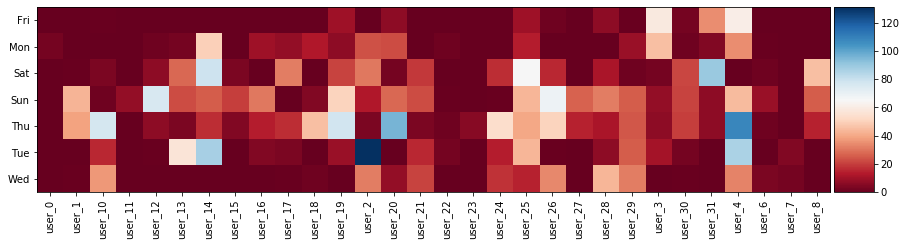

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
im = ax.imshow(data, cmap='RdBu')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_xticks(range(data.shape[1]))
ax.set_yticks(range(data.shape[0]))
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.index)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()


In [13]:
con.close()